In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# Importing all important libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Check for all zero cholestrol values
len(df[df['chol'] == 0])

172

In [4]:
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)


In [5]:
# replace zero values with NaN in cholestrol column
df['chol'] = df['chol'].replace(0, np.nan)
# calculate the percentage of missing values in the column
missing_percentage = df['chol'].isnull().sum() / df.shape[0] * 100
missing_percentage = round(missing_percentage, 2)

In [6]:
feature_percent = round(((df.isnull().sum() / len(df)) * 100 ).sort_values(ascending=False),2)

# add % sympbol
feature_percent = feature_percent.astype(str) + '%'
feature_percent

ca          66.41%
thal        52.83%
slope       33.59%
chol        21.96%
fbs          9.78%
oldpeak      6.74%
trestbps     6.41%
thalch       5.98%
exang        5.98%
restecg      0.22%
id            0.0%
age           0.0%
sex           0.0%
dataset       0.0%
cp            0.0%
num           0.0%
dtype: object

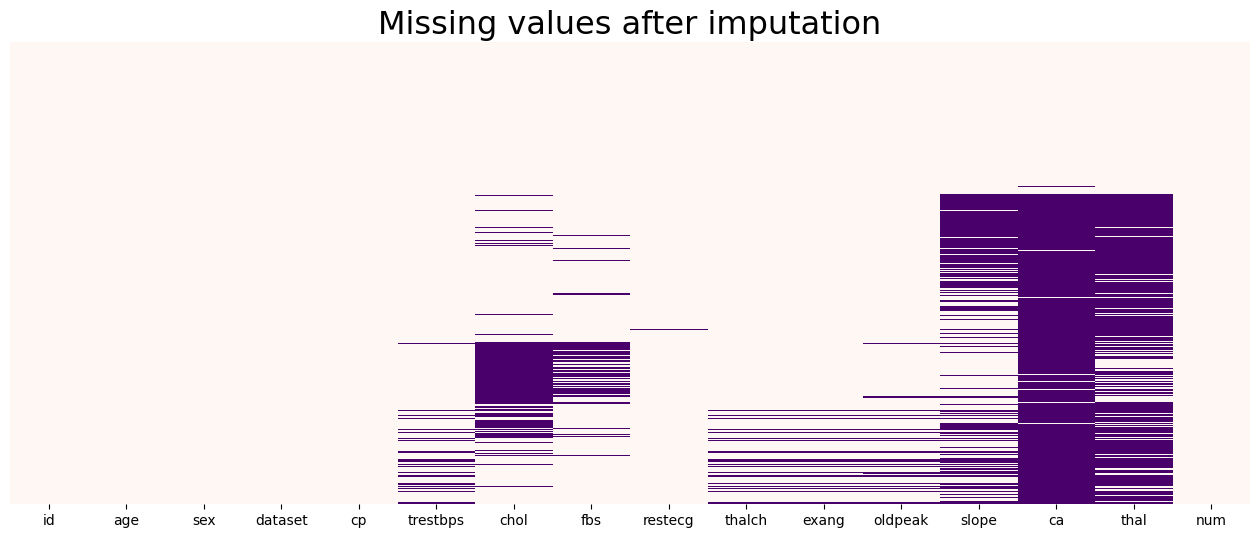

In [7]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [8]:
# Import KNNImputer from sklearn.impute
from sklearn.impute import KNNImputer

# Initialize KNNImputer with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)

# Use KNNImputer to fill missing values in 'chol' column
df['chol'] = imputer.fit_transform(df[['chol']])

# Convert 'chol' column to integer type
df['chol'] = df['chol'].astype(int)

In [9]:
# Automatically find numerical and categorical columns with missing values less than 10%
missing_threshold = 10  # 10% threshold for missing values
total_entries = len(df)
target_variable = 'num'

# list of numerical columns that have less than a certain threshold of missing values and are not the target variable.
numerical_cols = [
    col 
    for col in df.columns 
    if (
        (df[col].dtype in ['int64', 'float64']) and 
        (df[col].isnull().sum() / total_entries * 100) < missing_threshold  and
        (col != target_variable)
       
    )
]

# list of numerical columns that have less than a certain threshold of missing values
categorical_cols = [col
                   for col in df.columns 
                   if (
                        df[col].dtype == 'object') and 
                        (df[col].isnull().sum() / total_entries * 100) < missing_threshold]

# Apply simple imputation to numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in numerical_cols:
    df.loc[:,col] = num_imputer.fit_transform(df[[col]])

for col in categorical_cols:
    df.loc[:, col] = cat_imputer.fit_transform(df[[col]])

print('Observations from missing values after imputation'.upper())

# Confirm there are no missing values left
missing_values_sum = df[df.columns.difference(['thal', 'ca', 'slope'])].isnull().sum()

print(f"The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:\n{missing_values_sum}"  + "\n")
print('High missing values features'.upper())

# Display the features with missing values 
print(f"The sum of all high missing values where simple imputation wasn't used, is:\n{df[['thal', 'ca', 'slope']].isnull().sum()}")
    

OBSERVATIONS FROM MISSING VALUES AFTER IMPUTATION
The sum of all missing values, excluding features ['thal', 'ca', 'slope'], is:
age         0
chol        0
cp          0
dataset     0
exang       0
fbs         0
id          0
num         0
oldpeak     0
restecg     0
sex         0
thalch      0
trestbps    0
dtype: int64

HIGH MISSING VALUES FEATURES
The sum of all high missing values where simple imputation wasn't used, is:
thal     486
ca       611
slope    309
dtype: int64


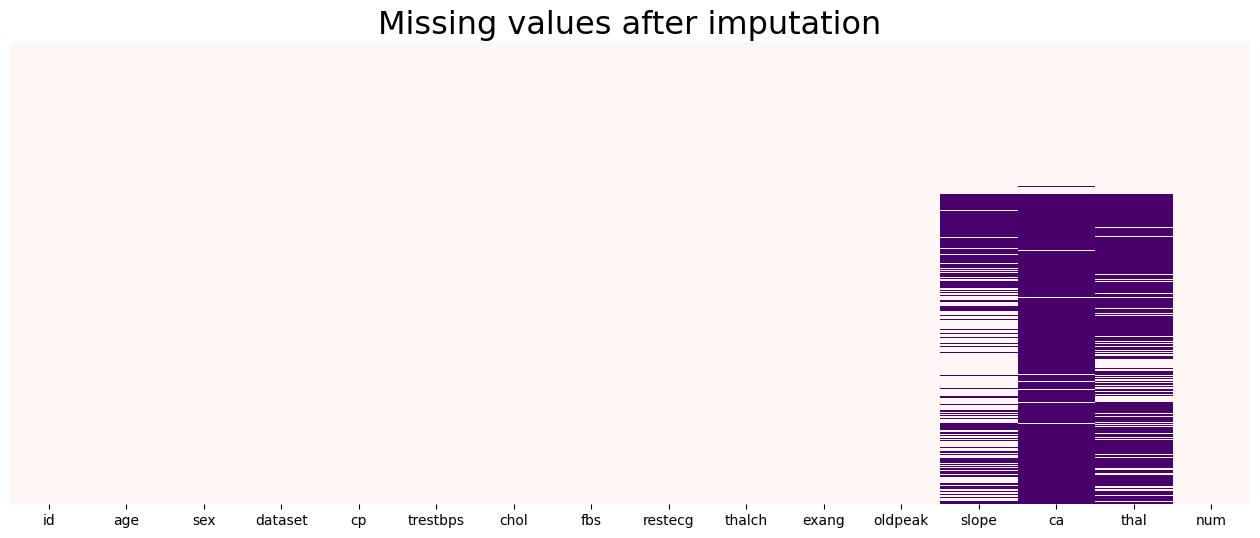

In [10]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [11]:
# split the dataset into two subset with one contaning complete data and the other containing 
# missing data for thal, ca, and slope. these dataset should still have all the columns in the result.
# create a new dataframe which removes all the rows that nan values
df_clean = df.dropna()

# create a new dataframe which contains all the rows that have nan values
df_missing = df[df.isna().any(axis=1)]

print('Complete data with no missing values'.upper())
print(f"The shape of the complete dataframe is: {df_clean.shape}")
print("\n")
print('Missing data with high missing values'.upper())
print(f"The shape of the dataframe with missing values is: {df_missing.shape}")

COMPLETE DATA WITH NO MISSING VALUES
The shape of the complete dataframe is: (299, 16)


MISSING DATA WITH HIGH MISSING VALUES
The shape of the dataframe with missing values is: (621, 16)


In [12]:
# Training and evaluating the model for the target variables 'slope', 'thal', and 'ca'.
def predict_and_evaluate(target_variable, drop_columns):
    # Drop specified columns from the DataFrame
    X = df_clean.drop(drop_columns, axis=1)
    
    # Select target variable(s)
    y = df_clean[target_variable]

    # Initialize LabelEncoder
    le = LabelEncoder()
    
    #le = OneHotEncoder()
    for col in X.columns:
        # If column is of object type
        if X[col].dtype == 'object':
            # Encode the column
            X[col] = le.fit_transform(X[col])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize RandomForestClassifier
    model = RandomForestClassifier(n_estimators=10, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print heading
    print(f'Model performance for {target_variable}'.upper())
    
    # Print accuracy score
    print(f"The accuracy of the model is: {round(accuracy_score(y_test, y_pred),2)}")

    # Print classification report
    print(f"Classification report:\n {classification_report(y_test, y_pred)}")

    # Return the trained model
    return model

In [13]:
# create a new dataframe and drop the target variables
df_encoded_pred = df_missing.drop(['slope', 'ca', 'thal'], axis=1)

In [14]:
# Train and evaluate a model for predicting the 'slope' feature, excluding 'slope', 'ca', and 'thal' from the input features.
rf_model_slope  = predict_and_evaluate('slope', ['slope', 'ca', 'thal'])

MODEL PERFORMANCE FOR SLOPE
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

 downsloping       0.00      0.00      0.00         3
        flat       0.70      0.76      0.73        25
   upsloping       0.75      0.75      0.75        32

    accuracy                           0.72        60
   macro avg       0.48      0.50      0.49        60
weighted avg       0.69      0.72      0.70        60



In [15]:
# Train and evaluate a model for predicting the 'ca' feature, excluding 'ca', and 'thal' from the input features.
rf_model_ca = predict_and_evaluate('ca', [ 'ca', 'thal'])

MODEL PERFORMANCE FOR CA
The accuracy of the model is: 0.72
Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.97      0.86        40
         1.0       0.67      0.15      0.25        13
         2.0       0.33      0.40      0.36         5
         3.0       0.00      0.00      0.00         2

    accuracy                           0.72        60
   macro avg       0.44      0.38      0.37        60
weighted avg       0.68      0.72      0.66        60



In [16]:
# # Train and evaluate a model for predicting the 'thal' feature.
rf_model_thal = predict_and_evaluate('thal', ['thal'])

MODEL PERFORMANCE FOR THAL
The accuracy of the model is: 0.7
Classification report:
                    precision    recall  f1-score   support

     fixed defect       0.00      0.00      0.00         4
           normal       0.67      0.94      0.78        31
reversable defect       0.76      0.52      0.62        25

         accuracy                           0.70        60
        macro avg       0.48      0.49      0.47        60
     weighted avg       0.67      0.70      0.66        60



In [17]:
def encode_and_predict(df, target_variable, model):

    # Initialize label encoder
    le = LabelEncoder()

    # Loop through each column in the DataFrame
    for col in df.columns:
        # Check if the column is of type 'object' (categorical)
        if df[col].dtype == 'object':
            # encode the categorical data to integers
            df[col] = le.fit_transform(df[col])
    # Use the model to apply predictions and assign the predicted values to the target variable
    df[target_variable] = model.predict(df)

In [18]:
# Encode categorical features and predict the 'slope' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'slope', rf_model_slope)
# Update the 'slope' column in df_missing with the predicted values
df_missing.loc[:,'slope'] = df_encoded_pred['slope']

df_encoded_pred = df_missing.drop(['ca', 'thal'], axis=1)
# Encode categorical features and predict the 'ca' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'ca', rf_model_ca)
# Update the 'ca' column in df_missing with the predicted values
df_missing.loc[:, 'ca'] = df_encoded_pred['ca']

df_encoded_pred = df_missing.drop(['thal'], axis=1)
# Encode categorical features and predict the 'thal' column in df_encoded_pred
encode_and_predict(df_encoded_pred, 'thal', rf_model_thal)
# Update the 'thal' column in df_missing with the predicted values
df_missing.loc[:, 'thal'] = df_encoded_pred['thal']

In [19]:
# merge df_clean and df_missing 
df = pd.concat([df_clean, df_missing])

print('Dataset shape inspect'.upper())
print(f"The shape of the dataset is: {df.shape[0]} rows and {df.shape[1]} columns.")

DATASET SHAPE INSPECT
The shape of the dataset is: 920 rows and 16 columns.


In [20]:
print('Missing values inspect'.upper())
if df.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

MISSING VALUES INSPECT
There are no missing values in the dataset.


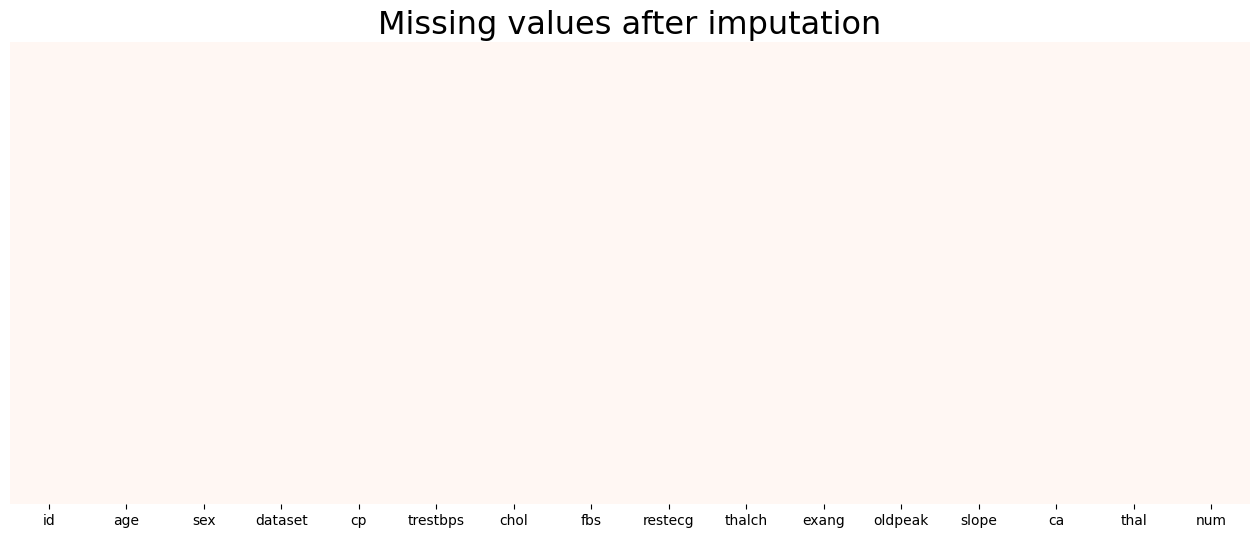

In [21]:
# create heatmap to check missing values after imputation
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')
plt.title('Missing values after imputation', size=23)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
# min max scaling to scale the thalch ca chol and tresbps columns
def scale_columns(df, columns):
 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    for column in columns:
        df[column] = scaler.fit_transform(df[[column]])
    
    return df

df = scale_columns(df, ['thalch', 'chol', 'trestbps', 'ca'])

In [23]:
# Plotting the histogram and boxplot to check the data distribution for the numerical columns 
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
    # Set to "dark" for a black background
    #sns.set(style="dark", palette="deep")
    shade = "#0000ff"
    # Set the figure size to accommodate the subplots
    plt.figure(figsize=(15, len(numerical_cols) * 5))

    # Loop through each numerical column and create a row with a histogram and a boxplot
    for i, col in enumerate(numerical_cols):
        # Histogram (left)
        ax1 = plt.subplot(len(numerical_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        ax1.set_facecolor('#ffffff')

        # Boxplot (right)
        ax2 = plt.subplot(len(numerical_cols), 2, 2*i + 2)
        sns.boxplot(x=df[col], color=cyan_palette[0], linewidth=1.5,medianprops={'color': 'white', 'linewidth': 2},
                    flierprops=dict(markerfacecolor=shade, marker='o', markeredgecolor=shade, markersize=5),
                    whiskerprops=dict(color=shade, linewidth=2.0),
                    capprops=dict(color=shade, linewidth=2.0),
                    boxprops=dict(edgecolor=shade, linewidth=2.0)),
                    
        plt.title(f'Boxplot of {col}')
        ax2.set_facecolor('#ffffff')

    # Adjust layout for better readability and display the plot
    plt.tight_layout()
    plt.show()

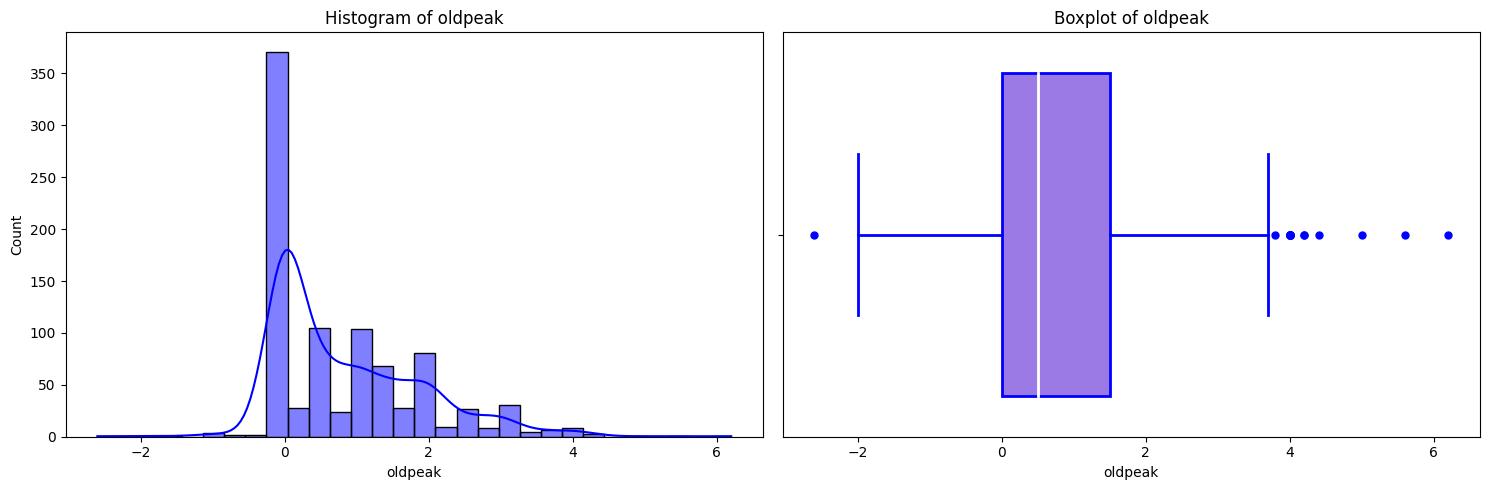

In [24]:
plot_histogram_and_boxplot(df, ['oldpeak'])


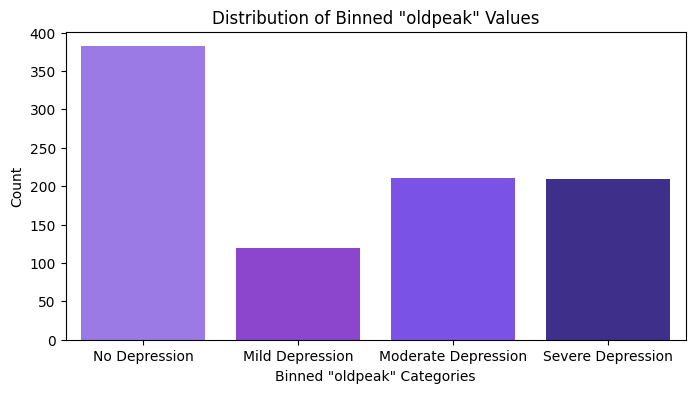

In [25]:
# Define bin edges according to the quartiles.
bin_edges = [-2.6, 0.0, 0.5, 1.5, 6.2]
shades = ['#9468F8', '#8B30E3', '#7039FF', '#341F9B', '#9556EB']
# Define labels for the bins.
bin_labels = ['No Depression', 'Mild Depression', 'Moderate Depression', 'Severe Depression']

# Bin the 'oldpeak' data.
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=bin_edges, labels=bin_labels, include_lowest=True)
oldpeak = df['oldpeak_binned']
df.drop('oldpeak_binned', axis=1, inplace=True)


# Plot the distribution of the binned data.
plt.figure(figsize=(8, 4))
sns.countplot(x=oldpeak, data=df, palette=shades)


plt.title('Distribution of Binned "oldpeak" Values')
plt.xlabel('Binned "oldpeak" Categories')
plt.ylabel('Count')

plt.show()

In [26]:
# custom class for outlier detection
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        # calculate the bounds for each column
        self.bounds_ = {}
        for column in X.columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            self.bounds_[column] = {
                'lower': Q1 - self.factor * IQR,
                'upper': Q3 + self.factor * IQR
            }
        return self

    def transform(self, X):
        # we flag the outliers in each column
        X_outliers = pd.DataFrame(index=X.index)
        for column in X.columns:
            lower_bound = self.bounds_[column]['lower']
            upper_bound = self.bounds_[column]['upper']
            X_outliers[column] = ~X[column].between(lower_bound, upper_bound)
        return X_outliers

In [27]:
# Get value count for the target variable
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [28]:
# Create a new column 'num_binary' in the dataframe 'df'. 
# If 'num' is greater than or equal to 2, 'num_binary' is 1, otherwise 0.
df['num_binary'] = df['num'].apply(lambda x:1 if x >= 2 else 0)

# Replace the 'num' column with the 'num_binary' column
df['num'] = df['num_binary']

# Drop the 'num_binary' column as it is no longer needed
df.drop('num_binary', axis=1, inplace=True)

In [29]:
df['num'].value_counts()


num
0    676
1    244
Name: count, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.2+ KB


In [31]:
models = {
'Random Forest Classifier': {
    'ID': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
    'params': {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 5],
        'model__min_samples_leaf': [1, 2],
    },
},
  'XGBoost Classifier': {
    'ID': 'XGBClassifier',
    'model': XGBClassifier(),
    'params': {
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [100],
        'model__gamma': [0, 0.1],
        'model__reg_alpha': [0]
    },
  },

    'LGBM Classifier': {
        'ID': 'LGBMClassifier',
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },


}

In [32]:
def calculate_error_ratio(df, target_column, feature_column, test_size=0.2, random_state=42, stratify=None ):

    # Define features and target
    X = df.drop([target_column], axis=1)  # Features
    y = df[target_column]  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify, test_size=test_size, random_state=random_state)

    # Calculate the percentage representation of feature_column in training and test sets
    train_percentages = X_train[feature_column].value_counts(normalize=True)*100
    test_percentages = X_test[feature_column].value_counts(normalize=True)*100

    # Calculate the error ratio
    error_ratio = abs(train_percentages - test_percentages)

    # Create a dataframe to compare the percentages
    compare_percentages = pd.DataFrame({             
            "random_train %": train_percentages,
            "random_test %": test_percentages,
            "error_ratio %": error_ratio
            })

    # Print the representation of feature_column value in training and test sets before stratified sampling
    if stratify is None:
        print(f'Representation of {feature_column} value in x_train and x_test before stratified Sampling'.upper())
    else:
        print(f'Representation of {feature_column} value in x_train and x_test after stratified Sampling'.upper())
    compare_error_df = round(compare_percentages,2)
    return  X_train, X_test, y_train, y_test, compare_error_df

In [33]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca')
compare_error_df

REPRESENTATION OF CA VALUE IN X_TRAIN AND X_TEST BEFORE STRATIFIED SAMPLING


,random_train %,random_test %,error_ratio %
ca,,,
0.000000,76.09,77.17,1.09
0.333333,13.72,13.04,0.68
0.666667,7.47,8.70,1.22
1.000000,2.72,1.09,1.63


In [34]:
%%time
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score

# # Define a pipeline for numerical features with a QuantileTransformer
# numerical_transformer  = Pipeline(steps=[
#   # Apply QuantileTransformer to transform numerical features to a normal distribution
#   #('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
# ])

# Define a pipeline for numerical features with a QuantileTransformer
numerical_transformer = Pipeline(steps=[
    ('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
])

# Define a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
  transformers=[
    # Apply numerical_transformer pipeline to numerical columns
    ('num', numerical_transformer, numerical_cols),
    # Detect and handle outliers in numerical columns
    ('outliers', OutlierDetector(factor=1.5), numerical_cols),
    # Apply OneHotEncoder to categorical columns
    ('cat', OneHotEncoder(), categorical_cols)
  ]
)

# Initialize a list to store model performance metrics
model_scores = []
# Initialize a variable to store the best accuracy found
best_accuracy = 0
# Initialize a variable to store the best estimator
best_estimator = None
# Dictionary to store cross-validation results
cv_res = {}
# Placeholder for numerical columns list
numerical_cols
# Placeholder for the best features selected by SelectKBest
selected_k_best = None

# Iterate over the models dictionary to train and evaluate each model
for name, model in models.items():
  # Define feature selection step using mutual information criterion
  feature_selection = SelectKBest(mutual_info_classif, k=10)
  # Define the pipeline with preprocessing, feature selection, and the model
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', model['model'])
  ])

  # Combine model-specific parameters with feature selection parameters
  full_params = model['params']
  full_params.update({
      # Define grid search options for 'k' in feature selection
      'feature_selection__k': [3, 5, 8, 'all']  
    })

  # Initialize GridSearchCV with the current model's pipeline and parameters
  grid = GridSearchCV(pipeline, 
    param_grid=full_params,
    cv=5, verbose=0, n_jobs=-1)

  # Fit GridSearchCV to training data
  grid.fit(X_train, y_train)

  # Retrieve the best estimator from the grid search
  best_model = grid.best_estimator_

  # Predict on the test set using the best estimator
  y_pred = best_model.predict(X_test)

  # Calculate accuracy of the predictions
  accuracy = accuracy_score(y_test, y_pred)

  # Store performance metrics for the current model
  model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })
  
  # Update best_accuracy and best_estimator if current model is better
  if accuracy > best_accuracy:  
      best_accuracy = accuracy
      best_estimator = grid.best_estimator_
      # Store cross-validation results for the best model
      cv_res[name] = grid.cv_results_

# Sort the performance metrics of models in descending order of accuracy
sorted_models = sorted(model_scores, key=lambda x: x['Accuracy'], reverse=True)
# Convert sorted model performances into a DataFrame for display
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])



In [ ]:
# Display classification models' performance metrics
print("Classification Models Performance")
metrics.round(2)

In [ ]:
# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Print the classification report of the best performing model
print("Classification Report of the Best Performing Ensemble Model:")
print(classification_report(y_test, best_estimator.predict(X_test)))

## Neural Network Impelemntation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [ ]:
df.info()

In [ ]:
df

In [ ]:
# Separate features and target variable
X = df.drop(columns=['num'])  # Features
y = df['num']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
# For simplicity, let's assume 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', and 'thal' are categorical
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols = X.columns.drop(categorical_cols)

# Preprocess numerical and categorical variables separately
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the neural network model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', MLPClassifier(max_iter=500))])

# Define hyperparameters grid for tuning
# param_grid = {
#     'classifier__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (50, 50)],
#     'classifier__activation': ['relu', 'logistic'],
#     'classifier__solver': ['adam', 'sgd'],
# }



param_grid = {
    'classifier__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (50, 50)],
    'classifier__activation': ['relu', 'logistic'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001, 0.01],  
    'classifier__learning_rate': ['constant', 'adaptive'],  
    'classifier__momentum': [0.9, 0.95, 0.99],  
    'classifier__batch_size': [32, 64, 128], 
    'classifier__shuffle': [True, False],  
    'classifier__early_stopping': [True, False],  
    'classifier__validation_fraction': [0.1, 0.2, 0.3],  
    'classifier__beta_1': [0.9, 0.95, 0.99],  
}


# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))

In [ ]:

# Best parameters and best score
print("Best parameters found for Neural Network Approach:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))